In [ ]:
# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

<font color='red'>
Q1:	35	  
Q2: 	39	  
Total:	74	  



## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 2 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [2]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

/home/ghristov/miniconda3/envs/mlp/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: (a) the specification of an automobile in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.

## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [32]:
data_path = os.path.join(os.getcwd(), 'datasets', 'features.csv')
gene_features = pd.read_csv(data_path, delimiter = ',')

print('Number of data points: {}. Number of attributes: {}'.format(auto_numeric.shape[0],auto_numeric.shape[1]))


Number of data points: 117. Number of attributes: 101


<font color='red'>
Good!



### ========== Question 1.2 ==========
Display the first 8 instances of the dataset.

In [34]:
gene_features.head(8)

,ORG,Gene,AUC,Gene len (bp),Exon1 len (bp),Exon2 len (bp),Intron len (bp),5ss-BP len (bp),BP-3ss len (bp),"ΔG per bp, intron",...,GUC,CUC,AGC,UGC,GGC,CGC,ACC,UCC,GCC,CCC
0,YFL039C,ACT1,0.481,1437,10,1118,309,266,44,-0.161,...,0.007,0.020,0.003,0.020,0.003,0.003,0.013,0.013,0.000,0.010
1,YDL029W,ARP2,0.235,1299,22,1154,123,109,15,-0.227,...,0.000,0.025,0.008,0.025,0.017,0.000,0.017,0.000,0.017,0.033
2,YML036W,CGI121,0.740,652,456,90,106,65,42,-0.092,...,0.000,0.010,0.010,0.000,0.000,0.000,0.029,0.010,0.010,0.000
3,YBL059C-A,CMC2,0.856,415,34,296,85,57,29,-0.074,...,0.000,0.024,0.000,0.024,0.000,0.000,0.000,0.036,0.012,0.024
4,YKL190W,CNB1,0.499,604,52,476,76,58,19,-0.143,...,0.000,0.000,0.000,0.000,0.000,0.000,0.014,0.000,0.000,0.000
5,YLL050C,COF1,0.483,611,14,418,179,47,133,-0.228,...,0.006,0.028,0.006,0.011,0.000,0.006,0.000,0.023,0.006,0.006
6,YIL111W,COX5B,0.219,544,1,455,88,57,32,-0.125,...,0.000,0.000,0.012,0.012,0.000,0.000,0.000,0.012,0.000,0.000
7,YNL130C,CPT1,0.586,1274,50,1132,92,58,35,-0.076,...,0.000,0.000,0.000,0.022,0.011,0.000,0.011,0.000,0.000,0.011


<font color='red'>
Good!



### ========== Question 1.3 ==========
Display the summary statistics for the dataset.

In [35]:
gene_features.describe()


,AUC,Gene len (bp),Exon1 len (bp),Exon2 len (bp),Intron len (bp),5ss-BP len (bp),BP-3ss len (bp),"ΔG per bp, intron","ΔG per bp, 5ss-BP","ΔG per bp, 3ss-BP",...,GUC,CUC,AGC,UGC,GGC,CGC,ACC,UCC,GCC,CCC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.721188,854.923077,45.923077,482.589744,326.410256,287.102564,40.307692,-0.179949,-0.177915,-0.037983,...,0.005632,0.007880,0.008940,0.011359,0.004701,0.003752,0.008547,0.010171,0.004718,0.004547
std,0.229356,313.480191,83.579320,334.140512,145.162463,144.922535,19.605797,0.038695,0.045880,0.094064,...,0.004813,0.006089,0.005576,0.007611,0.004365,0.003605,0.005801,0.006474,0.004353,0.006005
min,0.060000,297.000000,1.000000,90.000000,63.000000,47.000000,14.000000,-0.266000,-0.275000,-0.265000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.583000,691.000000,7.000000,296.000000,200.000000,121.000000,30.000000,-0.204000,-0.207000,-0.106000,...,0.002000,0.004000,0.006000,0.007000,0.000000,0.000000,0.004000,0.006000,0.000000,0.000000
50%,0.790000,825.000000,21.000000,405.000000,384.000000,331.000000,38.000000,-0.184000,-0.187000,-0.053000,...,0.006000,0.007000,0.008000,0.011000,0.004000,0.003000,0.009000,0.009000,0.004000,0.004000
75%,0.898000,972.000000,47.000000,545.000000,432.000000,391.000000,47.000000,-0.162000,-0.163000,0.018000,...,0.008000,0.010000,0.013000,0.014000,0.008000,0.006000,0.013000,0.014000,0.008000,0.007000
max,1.015000,2870.000000,591.000000,2652.000000,561.000000,531.000000,156.000000,-0.074000,-0.017000,0.260000,...,0.028000,0.028000,0.028000,0.043000,0.021000,0.019000,0.029000,0.036000,0.020000,0.033000


<font color='red'>
Good!



### ========== Question 1.4  ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

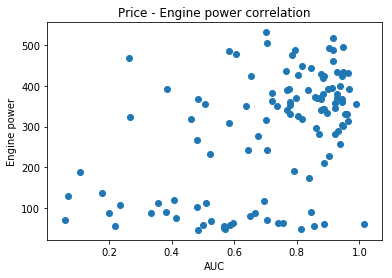

In [36]:
plt.scatter(gene_features['AUC'], auto_numeric['5ss-BP len (bp)'])
plt.xlabel('AUC')
plt.ylabel('Engine power')
#plt.title('Price - Engine power correlation')


<font color='red'>
Good!



### ========== Question 1.5  ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

From the scatter plot we can see there is no apparent correlation between engine-power and price and thus engine-power alone is not sufficient for predicting the price. Also there seem to be a few outliers in the data.


<font color='red'>
These attributes are definitely correlated - but weakly. So engine price would have some predictive power, but not much.


### ========== Question 1.6  ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

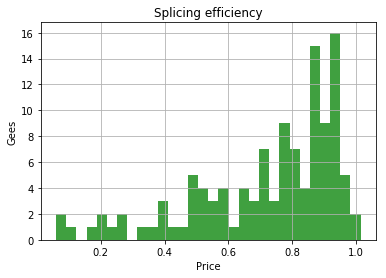

In [37]:
patches = plt.hist(gene_features['AUC'], 30, facecolor='g', alpha=0.75)

plt.xlabel('Price')
plt.ylabel('Gees')
plt.title('Splicing efficiency')
plt.grid(True)
plt.show()

<font color='red'>
Good!



### ========== Question 1.7  ==========
How would you preprocess it to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

As linear regression is very sensitive to outliers it would be a good idea to remove outliers during preprocessing to improve performace.



<font color='red'>
While there are some values considerably higher than others in this dataset, these are not 'outliers' in the sense of being erroreous data or noise - they are just expensive cars! Removing these would be incorrect.

A better option is to attempt to transform our data into a more normal form, e.g. by taking a log transformation.



### ========== Question 1.8  ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [38]:
X = gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
y = gene_features['AUC']

<font color='red'>
Good!



### ========== Question 1.9 ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [30]:
X = np.asarray(X)
X= X.reshape(-1,1)
print(X.shape)

(11466, 1)


<font color='red'>
Good!



### ========== Question 1.10  ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)


<font color='red'>
Good!



### ========== Question 1.11  ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [40]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

<font color='red'>
Good!



### ========== Question 1.12  ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [46]:
#print('Coefficients of engine-power feature: {}'.format(lr.coef_))

price_pred = lr.coef_*X_test + lr.intercept_   #equation for predicting the price of a car given the engine-power

#print(y_test)
#print(price_pred)
print('Accuracy score of built-in function:    {}'.format(r2_score(y_test, lr.predict(X_test))))    
#print('Accuracy score using provided equation: {}'.format(r2_score(y_test, price_pred)))

Accuracy score of built-in function:    -4.345949002394641


<font color='red'>
Good, although we were asking for a written version of the equation, e.g.

price = 0.09 * engine-power + 2823


### ========== Question 1.13  ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

The magnitude of the the regression coefficient relates to how influential a variable is on the target. In this case engine-power feature coefficient is very small so we can deduce it is not an important influential variable.


<font color='red'>
No - the value of the coefficient *can't* tell us how influential the related variable is because the units used for the variable are arbritary. For example, conisder a "height" variable - if height is measured in m, the learned coefficient will be 100 times higher than if height was measured in cm. So the magnitude of the coefficient is meaningless.


### ========== Question 1.14  ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

In [47]:
def fit_scatter(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    ax.set_title('Price prediction based on engine-power')

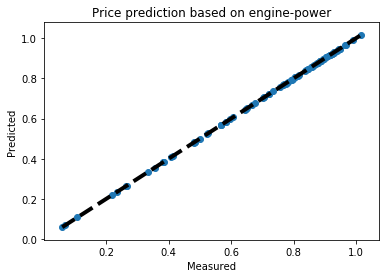

In [48]:
fit_scatter(y_train, lr.predict(X_train))

<font color='red'>
Not quite the plot we were looking for. You were expected to give a plot of price vs engine power, with the regression line overlaid.


### ========== Question 1.15  ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

Using hold-out validation we are have less training data to train our classifier which is especially bad when the dataset we have is small.



<font color='red'>
True, but the even bigger problem is that our testing set would be very small, and so likely not representative of the overall distribution of our data.


### ========== Question 1.16  ==========
Now we want to use [`KFold`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) cross-validation to evaluate the performance of the regression model. Famliriase yourself with the method and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's `K-fold` class construct a 5-fold cross-validation iterator for the `auto_numeric` dataset. Set the `shuffle` parameter to `True` and `random_state` to `0`. 

In [49]:
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)


<font color='red'>
Good!



### ========== Question 1.17  ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances only in each fold.

In [50]:
for train_index, test_index in kf:
    y_train, y_test = y[train_index], y[test_index]
    print('Mean value of price: {}'.format(y_train.mean()))

Mean value of price: 0.7181290322580646
Mean value of price: 0.7298279569892473
Mean value of price: 0.7190212765957448
Mean value of price: 0.7070957446808509
Mean value of price: 0.7319255319148936


<font color='red'>
Good!



### ========== Question 1.18  ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [51]:
lr = LinearRegression(normalize=True)
predictions = cross_val_predict(lr,X,y=y,cv=kf)
print(predictions.shape,y.shape)
print(predictions.shape == y.shape)

(117,) (117,)
True


<font color='red'>
Good!



### ========== Question 1.19  ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [52]:
print('Coefficient of determination: {}'.format(r2_score(y, predictions)))
print('Mean squared error: {}'.format(mean_squared_error(y, predictions)))
print('Root mean squared error: {}'.format(np.sqrt(mean_squared_error(y, predictions))))
print('Correlation coefficient: \n{}'.format(np.corrcoef(y, predictions)))

Coefficient of determination: -12.833206979371974
Mean squared error: 0.7214672286319062
Root mean squared error: 0.8493922701743324
Correlation coefficient: 
[[ 1.          0.18804048]
 [ 0.18804048  1.        ]]


<font color='red'>
Good, but you should just report the single relevent correlation coefficient.


### ========== Question 1.20  ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

The Mean squared error is the average deviation from truth, the Correlation Coefficient is the measure of the strength and direction of the linear relationship between two variables and the Coefficient of Determination is statistical measure of how close the data are to the fitted regression line or in other words how accurately the linear classifier predicts the class.
From our data we can see from the R^2 metric that we have a very low performance from our classifier and that the engine-power variable doesn't have a very strong correlation to the price.

<font color='red'>
Good! You should also point out the difference between the MAE and the RMSE, and note that the RMSE being significantly higher than the MAE suggests the existance of outlying points in our data, as the RMSE is more sentitive to extreme values than the MAE.



### ========== Question 1.21 ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

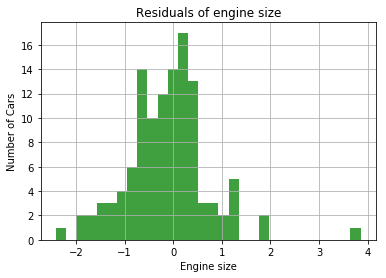

In [53]:

residuals = y - predictions;
patches = plt.hist(residuals, 30, facecolor='g', alpha=0.75)
plt.xlabel('Engine size')
plt.ylabel('Number of Cars')
plt.title('Residuals of engine size')
plt.grid(True)
plt.show()


*Your answer goes here*



<font color='red'>
Good, but no answer to the second part.



### ========== Question 1.22 ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [200]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path, delimiter = ',')
X = auto_base['engine-power']
X = np.asarray(X)
X = X.reshape(-1,1)
y = auto_base['price']
lr = LinearRegression()
predictions = cross_val_predict(lr,X,y=y,cv=kf)

print('Coefficient of determination: {}'.format(r2_score(y, predictions)))
print('Mean squared error: {}'.format(mean_squared_error(y, predictions)))
print('Root mean squared error: {}'.format(np.sqrt(mean_squared_error(y, predictions))))
print('Correlation coefficient: \n{}'.format(np.corrcoef(y, predictions)))

Coefficient of determination: -0.00213595381121
Mean squared error: 45304255.6208
Root mean squared error: 6730.84360395
Correlation coefficient: 
[[ 1.         -0.06191442]
 [-0.06191442  1.        ]]


<font color='red'>
Good!



### ========== Question 1.23 ==========
Show a scatter plot of true vs. predicted prices and another one of engine-power vs. predicted price. Use a single plot with two subplots. Label axes appropriately.

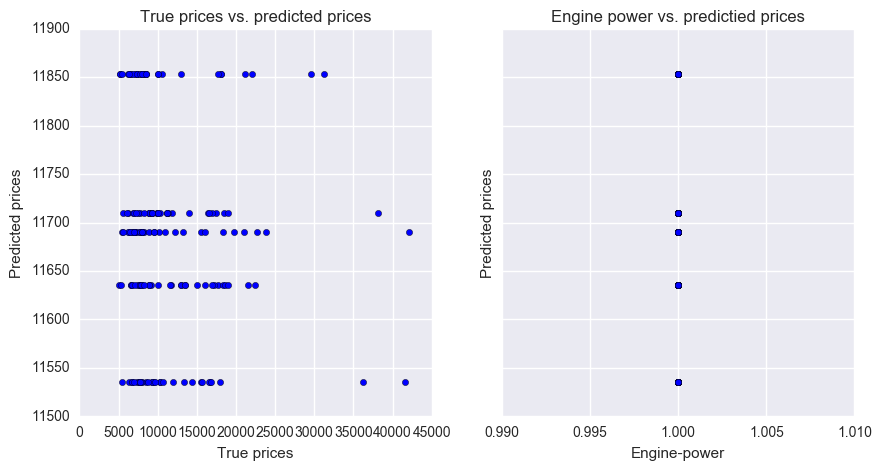

In [201]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
fig.set_figheight(5)
fig.set_figwidth(10)
ax1.scatter(y, predictions)
ax1.set_xlabel('True prices')
ax1.set_ylabel('Predicted prices')
ax1.set_title('True prices vs. predicted prices')
    
ax2.scatter(X, predictions)
ax2.set_xlabel('Engine-power')
ax2.set_ylabel('Predicted prices')
ax2.set_title('Engine power vs. predictied prices')


<font color='red'>
Good!



### ========== Question 1.24 ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

*Your answer goes here*



<font color='red'>
No answer


### ========== Question 1.25 ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics of the `auto_base` dataset.*)

In [202]:
auto_base.describe()


,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


Since all the values for engine power are the same for the various prices and as there are some outliers in the dataset this causes the linear regression model to perform very poorly when just using the engine-power attribute for predictions. 


<font color='red'>
Good, although the existance of outliers is largely irrelevent in this case, as we have no information to fit a line in any case.



## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://seaborn.github.io/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function useful for this question.*

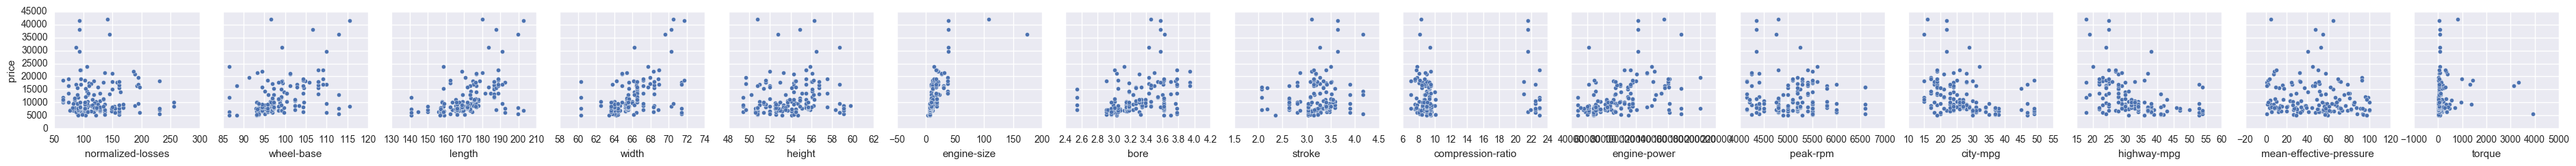

In [203]:
X = auto_numeric.drop(['price'],axis=1)
variable_names = X.columns.values
sns.pairplot(auto_numeric, x_vars=variable_names, y_vars='price')

From the graphs we can see that the attributes 'lenght','width','height' display some correlation nad thus can be used to predict the price. Attributes like 'compression-ratio','torque' seem to be irrelevant to predicting the price and may be removed.

<font color='red'>
Good!

You were also asked to report on correlations *between* attributes, which you didn't do. For example, length and width are highly correlated, so keeping *both* of these is unlikely to help improve predictive power.



### ========== Question 2.2 ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [204]:
y = auto_numeric['price']
lr = LinearRegression()
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)
predictions = cross_val_predict(lr,X,y=y,cv=kf)

<font color='red'>
Good!



### ========== Question 2.3 ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [205]:
print('Coefficient of determination: {}'.format(r2_score(y, predictions)))
print('Mean absolute error: {}'.format(mean_absolute_error(y, predictions)))
print('Root mean squared error: {}'.format(np.sqrt(mean_squared_error(y, predictions))))


Coefficient of determination: 0.486137984457
Mean absolute error: 3050.34459963
Root mean squared error: 4819.80464283


<font color='red'>
Good!



### ========== Question 2.4 ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

Using all the attributes instead of just one gives us a higher coefficienf of determination which means the linear regression model has a higher performance now.


<font color='red'>
Good! Lower errors and higher CC also agree with this model performing better.



### ========== Question 2.5 ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

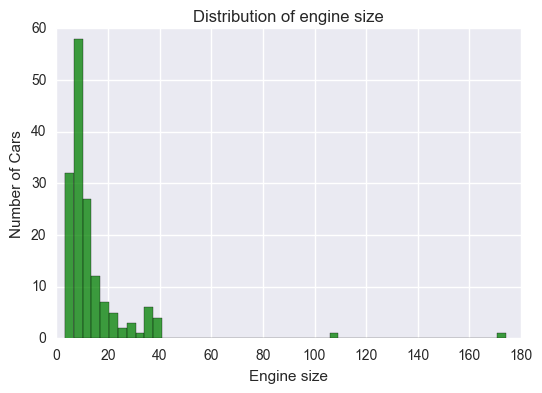

In [206]:
patches = plt.hist(auto_numeric['engine-size'], 50, facecolor='g', alpha=0.75)

plt.xlabel('Engine size')
plt.ylabel('Number of Cars')
plt.title('Distribution of engine size')
plt.grid(True)
plt.show()

<font color='red'>
Good!



### ========== Question 2.6 ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

Visualizing the data, we can see that there are a few outliers in the engine-size variable. As linear regression is sensitive ot outliers, this may cause problems and reduce performance.


<font color='red'>
Good!

### ========== Question 2.7 ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

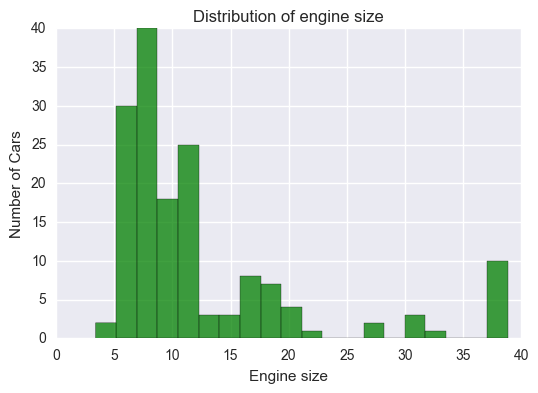

In [207]:
outliers_index = list()

engine_size = auto_numeric['engine-size']
eng_mean = np.asarray(engine_size.mean(axis=0))
eng_std = np.asarray(engine_size.std(axis=0))
eng_mean = eng_mean.reshape(-1,1)
eng_std = eng_std.reshape(-1,1)

indexes = engine_size.values > eng_mean + 2*(eng_std)

for i in engine_size:
    outliers_index.append(engine_size[indexes[0]].index)

auto_numeric_clean = auto_numeric.copy()
auto_numeric_clean = auto_numeric_clean.drop(outliers_index[0]) 

patches = plt.hist(auto_numeric_clean['engine-size'], 20, facecolor='g', alpha=0.75)

plt.xlabel('Engine size')
plt.ylabel('Number of Cars')
plt.title('Distribution of engine size')
plt.grid(True)
plt.show()

<font color='red'>
As mentioned in 1.7, removing these outliers is not appropriate. A log transformation would be a better solution here.


### ========== Question 2.8 ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [208]:
X = auto_numeric_clean.drop(['price'],axis=1)
y = auto_numeric_clean['price']

lr = LinearRegression()
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)
predictions = cross_val_predict(lr,X,y=y,cv=kf)

print('R^2: {}'.format(r2_score(y, predictions)))
print('MAE: {}'.format(mean_absolute_error(y, predictions)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y, predictions))))
print('CC: \n{}'.format(np.corrcoef(y, predictions)))

R^2: 0.591903992276
MAE: 2717.51808177
RMSE: 3829.86789319
CC: 
[[ 1.          0.77430224]
 [ 0.77430224  1.        ]]


<font color='red'>
Good!



### ========== Question 2.9 ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

Removing the outliers from the dataset has greatly increased the performance of the model, as linear regression is sensitive to outliers.



<font color='red'>
Good!



### ========== Question 2.10 ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [209]:
pd.set_option('max_columns', 30)

In [210]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(data_path, delimiter = ',')
print('Number of sampes: {}'.format(auto_full.shape[0]))
print('Number of attributers: {}'.format(auto_full.shape[1]))
auto_full.head(20)

Number of sampes: 159
Number of attributers: 27


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


<font color='red'>
Good!



### ========== Question 2.11 ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression?

The attributes 'make', 'fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','fuel-system' are categorical as they have different categories which are not ordered in any perticular way. Since linear regression works with numbers, we must transform the attributes to corresponding numeric values.


<font color='red'>
Good!



### ========== Question 2.12 ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiriase yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [211]:
auto_full_edit = auto_full.copy()
y = auto_full['price']
auto_full_edit = auto_full_edit.drop(['price'],axis=1) #Remove the target variable
le_dict = dict()

#Transform the categorical attributes with the label encoder
for column in auto_full_edit[['make', 'fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system']]:  
    le = LabelEncoder().fit(auto_full[column])
    auto_full_edit[column] = le.transform(auto_full[column])
    le_dict[column] = le

#Get indices of the categorical attributes 
cat_features_names = ['make', 'fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system']
cat_features_indices = list()
for i in cat_features_names:
    cat_features_indices.append(auto_full_edit.columns.get_loc(i))
    

enc = OneHotEncoder(categorical_features = cat_features_indices);
X_enc = enc.fit_transform(auto_full_edit)

print(X_enc.shape)

(159, 60)


<font color='red'>
Good!



### ========== Question 2.13 ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [212]:
lr = LinearRegression()
kf = KFold(X_enc.shape[0],n_folds=5,shuffle=True,random_state=0)
predictions = cross_val_predict(lr,X_enc,y=y,cv=kf)

print('R^2: {}'.format(r2_score(y, predictions)))
print('MAE: {}'.format(mean_absolute_error(y, predictions)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y, predictions))))
print('CC: \n{}'.format(np.corrcoef(y, predictions)))


R^2: 0.864103912601
MAE: 1747.87852819
RMSE: 2478.6183137
CC: 
[[ 1.          0.93249132]
 [ 0.93249132  1.        ]]


<font color='red'>
Good!



### ========== Question 2.14 ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

Comparing to the metrics from the previos models we can see that this one had a much better performance judging by the Coefficient of Determination metric which is much higher. There we would get a higher accuracy from a more complrex model but it would have a higher computarional cost preprocessing and transforming the data and also would use more memory for storing the transformed data.

<font color='red'>
Good!



### ========== Question 2.15 ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. You should still make use of the transformations applied in 2.8. Has your performance improved? Explain your answer in 1-2 sentences.

In [213]:
kf = KFold(X_enc.shape[0],n_folds=5,shuffle=True,random_state=0)

dtr = DecisionTreeRegressor()
predictions_dtr = cross_val_predict(dtr,X_enc,y=y,cv=kf)

print('DecisionTreeRegressor R^2: {}'.format(r2_score(y, predictions_dtr)))
print('DecisionTreeRegressor MAE: {}'.format(mean_absolute_error(y, predictions_dtr)))
print('DecisionTreeRegressor RMSE: {}'.format(np.sqrt(mean_squared_error(y, predictions_dtr))))
print('DecisionTreeRegressor CC: \n{}'.format(np.corrcoef(y, predictions_dtr)))

print('\n')
rfr = RandomForestRegressor()
predictions_rfr = cross_val_predict(rfr,X_enc,y=y,cv=kf)

print('RandomForestRegressor R^2: {}'.format(r2_score(y, predictions_rfr)))
print('RandomForestRegressor MAE: {}'.format(mean_absolute_error(y, predictions_rfr)))
print('RandomForestRegressor RMSE: {}'.format(np.sqrt(mean_squared_error(y, predictions_rfr))))
print('RandomForestRegressor CC: \n{}'.format(np.corrcoef(y, predictions_rfr)))



DecisionTreeRegressor R^2: 0.69505213591
DecisionTreeRegressor MAE: 2321.4591195
DecisionTreeRegressor RMSE: 3712.94892887
DecisionTreeRegressor CC: 
[[ 1.          0.84356103]
 [ 0.84356103  1.        ]]


RandomForestRegressor R^2: 0.830779239009
RandomForestRegressor MAE: 1839.80566038
RandomForestRegressor RMSE: 2765.87787039
RandomForestRegressor CC: 
[[ 1.         0.9221935]
 [ 0.9221935  1.       ]]


The RandomForestRegressor seems to have a good performance as well but not better than the multivariate linear regression model from 2.13

<font color='red'>
Good, although would be improved with a little commentary on why you think this regressor does  worse than linear regression.
